<a href="https://colab.research.google.com/github/Mittra19/MachineLearningPub/blob/master/SeverityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from pandas import DataFrame 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier 
from xgboost import plot_importance

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *

# Data Preprocessing

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/How severe can an airplane accident Competition/train.csv')

df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/How severe can an airplane accident Competition/test.csv')

In [33]:
damageNinjury_type_mapping = {label: idx for idx, label in enumerate(np.unique(df_train['Severity']))}
print(damageNinjury_type_mapping)

{'Highly_Fatal_And_Damaging': 0, 'Minor_Damage_And_Injuries': 1, 'Significant_Damage_And_Fatalities': 2, 'Significant_Damage_And_Serious_Injuries': 3}


In [0]:
column_fin=['Accident_ID', 'Safety_Score', 'Days_Since_Inspection','Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Severity'] 
   
# create the new index for columns 
df_train_fin = df_train.reindex(column_fin, axis='columns')

In [0]:
column_fin_test = ['Accident_ID', 'Safety_Score', 'Days_Since_Inspection','Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']
# create the new index for columns 
df_test_fin = df_test.reindex(column_fin_test, axis='columns')

# Training Set and Testing Set Building

In [0]:
X, y = df_train_fin.iloc[:, 0:11].values, df_train_fin.iloc[:, 11].values

In [0]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
X_train_org, X_train_val_org, y_train, y_train_val = train_test_split( X, y, test_size=0.33, random_state=42)

In [0]:
X_train, X_train_val = X_train_org[:, 1:11], X_train_val_org[:, 1:11]

#XGBoost

In [41]:
clf_xgb = XGBClassifier(learning_rate=0.001, max_depth=20, random_state=1, booster='gbtree', n_estimators=100)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_val_xgb = clf_xgb.predict(X_train_val)

In [43]:
print(f1_score(y_true= y_train_val, y_pred= y_pred_val_xgb, average= 'weighted'))

0.9180228653852593


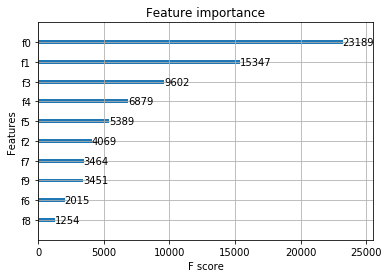

In [44]:
plot_importance(clf_xgb)

In [45]:
feature_weights = clf_xgb.feature_importances_
print(feature_weights)

[0.12727414 0.11681677 0.01009401 0.13859259 0.01288278 0.01164227
 0.52407134 0.01081213 0.01257387 0.03524014]


In [46]:
print(X_train[0])
print(feature_weights)

[-1.12927679  1.43204392 -0.94157281  0.96552744 -1.21689668 -0.1592009
  0.09729395 -0.56934495 -0.9733362  -0.54246218]
[0.12727414 0.11681677 0.01009401 0.13859259 0.01288278 0.01164227
 0.52407134 0.01081213 0.01257387 0.03524014]


In [0]:
for j in range(X_train.shape[0]):
  for i in range(X_train[j].shape[0]):
    df_train_fin = (X_train[j][i]*feature_weights[i])

In [0]:
weights = np.empty(shape=[6700, 10])
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[1]):
    weights[i][j] = feature_weights[j]

In [0]:
print(weights)

[[0.12727414 0.11681677 0.01009401 ... 0.01081213 0.01257387 0.03524014]
 [0.12727414 0.11681677 0.01009401 ... 0.01081213 0.01257387 0.03524014]
 [0.12727414 0.11681677 0.01009401 ... 0.01081213 0.01257387 0.03524014]
 ...
 [0.12727414 0.11681677 0.01009401 ... 0.01081213 0.01257387 0.03524014]
 [0.12727414 0.11681677 0.01009401 ... 0.01081213 0.01257387 0.03524014]
 [0.12727414 0.11681677 0.01009401 ... 0.01081213 0.01257387 0.03524014]]


In [0]:
featured_X_train = np.multiply(X[:6700, 1:11], weights)

In [50]:
print(featured_X_train)

[[ 5.79482422e-02  3.52764498e-02  2.23488613e-02 ... -7.63865054e-04
   1.19435784e-02  1.56008404e-02]
 [ 1.62387587e-01 -9.67338404e-02  2.95882029e-02 ... -6.85203450e-03
  -1.47511294e-04  8.94299631e-03]
 [ 1.67069350e-01  2.27387725e-03  1.36616513e-02 ...  8.33104965e-03
   1.19435784e-02 -2.33268191e-02]
 ...
 [-1.81181843e-01  2.00289313e-01  2.07870457e-03 ... -5.17490227e-03
   1.19435784e-02 -1.10196052e-02]
 [-6.98999206e-02  1.67286740e-01 -6.60850544e-03 ... -2.09416180e-03
  -2.43296907e-02 -1.84853131e-02]
 [-5.79577138e-03 -3.07286953e-02 -9.50424212e-03 ...  1.80198137e-04
   2.40346681e-02 -8.82117836e-03]]


In [0]:
sc = StandardScaler()
featured_X_train = sc.fit_transform(featured_X_train)

In [0]:
X_test = df_test_fin.iloc[:, 1:].values

In [0]:
X_test_std = sc.fit_transform(X_test)

In [0]:
X1 = X[:, 1:11]

In [0]:
print(X_train.shape[0])
print(feature_weights.shape)

6700


NameError: ignored

#Decision Tree Classifier

In [0]:
clf_tree = DecisionTreeClassifier(criterion= 'entropy')
clf_tree.fit(X_train, y_train, sample_weight= weights)

ValueError: ignored

In [0]:
y_pred_tree = clf_tree.predict(X_train_val)

In [0]:
print(f1_score(y_true= y_train_val, y_pred= y_pred_tree, average= 'weighted'))

0.9252528818931726


#Random Forest Classifier

In [0]:
clf_forest = RandomForestClassifier(random_state=42, criterion='entropy')
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_forest = clf_forest.predict(X_train_val)

In [0]:
print(f1_score(y_true= y_train_val, y_pred= y_pred_forest, average= 'weighted'))

0.9251362216900786


#Neural Network

In [54]:
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, ), random_state=1, learning_rate='adaptive', activation = 'relu')
clf_nn.fit(featured_X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_pred_val_nn = clf_nn.predict(X_train_val)

In [56]:
print(f1_score(y_true= y_train_val, y_pred= y_pred_val_nn, average= 'weighted'))

0.24498636191325915


#Output

In [0]:
y_pred = clf_nn.predict(X_test_std)

In [0]:
output = {
    'Accident_ID': df_test_fin.iloc[:, 0].values,
    'Severity' : y_pred
}
df = DataFrame(output, columns=['Accident_ID', 'Severity'])

In [0]:
print(df)

      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21        Significant_Damage_And_Fatalities
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [0]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/How severe can an airplane accident Competition/output.csv', index = False)